##Question 1 - CodeRunner: Regression Rumble

Gradient Decent algorithm is used to optimise our model parameters.

The main idea is that we propagate opposite the direction of the gradient of the cost function at a given hyper parameter w or b.

To understand better, let us get our hands dirty! Below is the code implemented for the linear regression algorithm.

* We generate a regression data using the skikit_learns inbuilt library.
* We generate random weight matrices using the np.random.randn function
* Apply the GD Algorithm
 * Calculate the output of the model.
 * Calculate the error. (Used in the MSE Cost function)
 * Compute the gradient of the Cost function wrt our hyperparameter.
 * Update theta.

Have a look at the code below and fill in the necessary blanks "..."

Note:- Use the Mean Square error as your cost function given as:

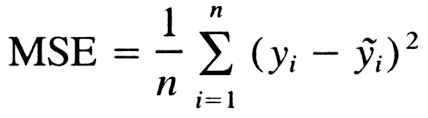

ybar is the predicted output.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# sklearn.datasets.make_regression is a function in scikit-learn that generates
# a random regression dataset with specified parameters, such as the number of
# samples, number of features, and level of noise.

X, y = make_regression(n_samples=100, n_features=1, noise=10)

In [19]:
def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameter theta (our weight matrix)
    #Use the np.random.randn function for the same.
    theta = np.random.randn()

    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted values:
        predictions = np.dot(X,theta)

        # Calculate the error: use the mse function
        error = y - predictions.T
        
        # Calculate the gradients: 1/m * X.T * error
        gradients = -1/m * np.sum(X.T * error)
        
        # Update parameters: Apply the GD algorithm
        theta -= learning_rate*gradients

        # Calculate the cost function: MSE
        cost = 1/m * np.sum((y - predictions.T)**2)
        print(cost)
        cost_history.append(cost)

    return theta, cost_history



In [24]:
# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Call the gradient_descent function and store the results
theta, cost_history = gradient_descent(X,y,learning_rate,num_iterations)

4493.08736597586
4414.999726130099
4338.296673752637
4262.953658447774
4188.946565127762
4116.251706294265
4044.8458144566903
3974.7060346849457
3905.809917294251
3838.135410659652
3771.6608541579376
3706.364971234715
3642.2268625944084
3579.2259995110066
3517.3422172574224
3456.5557086513495
3396.847017715575
3338.197033450684
3280.5869837181913
3223.998429232131
3168.413257657188
3113.8136778114585
3060.1822139720293
3007.5017002815
2955.7552752537035
2904.926376376835
2854.9987348122795
2805.9563701874367
2757.7835854808695
2710.464961998146
2663.9853544367734
2618.3298860386294
2573.4839438283457
2529.433173936128
2486.1634770035
2443.661003670513
2401.912150142976
2360.903553838275
2320.6220891084067
2281.054863038843
2242.1892113218837
2204.01269420319
2166.513092500179
2129.6784036910226
2093.496838072996
2057.956814988937
2023.0469591206177
1988.7560968478374
1955.0732526720813
1921.9876457035768
1889.4886862106548
1857.565972230282
1826.2092862386996
1795.4085918810947
1765.15

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


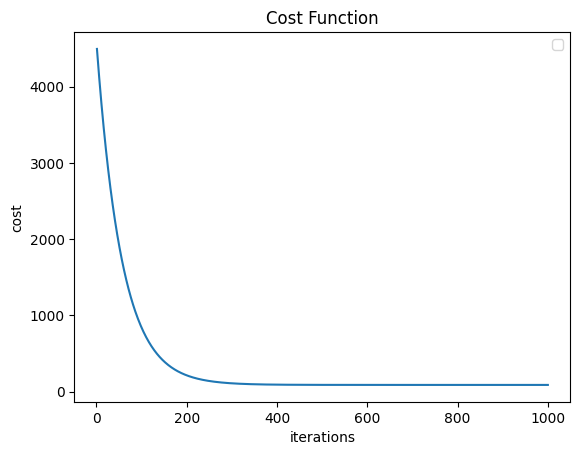

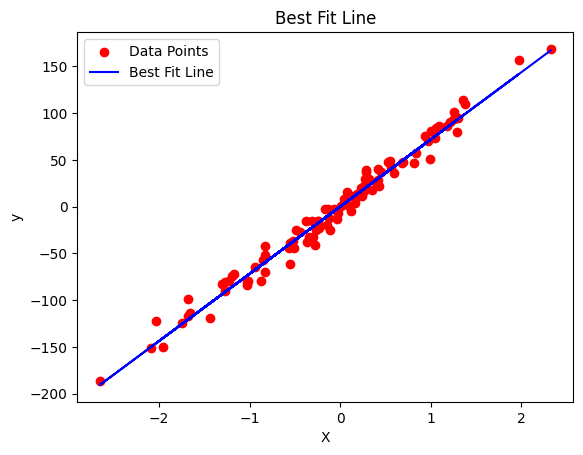

In [25]:
# Plot the cost function over iterations
iterations = np.arange(1,num_iterations + 1 , 1)
plt.plot(iterations,cost_history)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('Cost Function')
plt.legend()
plt.show()

# Plot the best fit line
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, np.dot(X, theta), color='blue', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

##Question 2 - CodeRunner: Regression Rumble II

The Logistic Regression algorithm is similar to Linear Regression minus the introdiction of a sigmoid activation function.

We also use the Binary Cross Entropy Cost function istead of MSE.

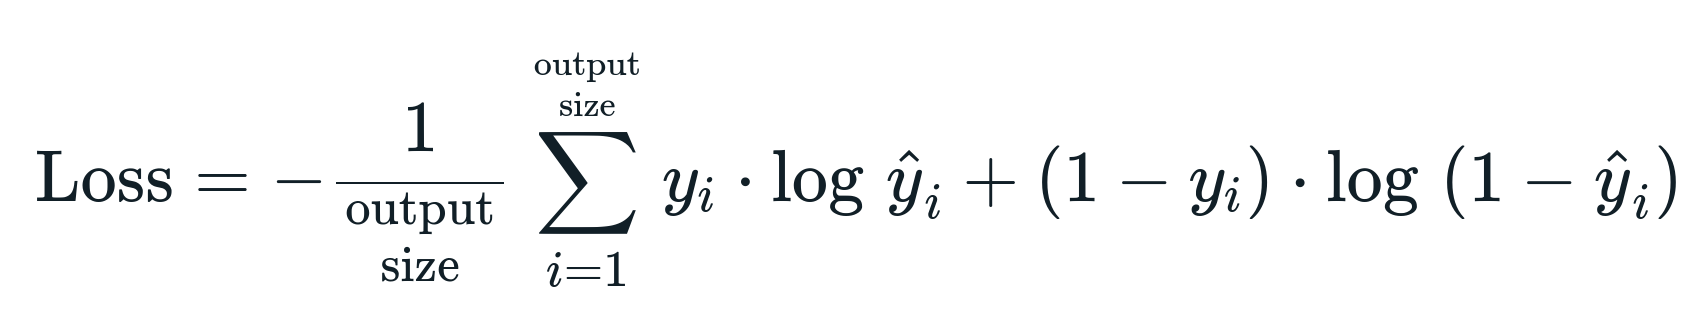


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate random classification data using scikit-learn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

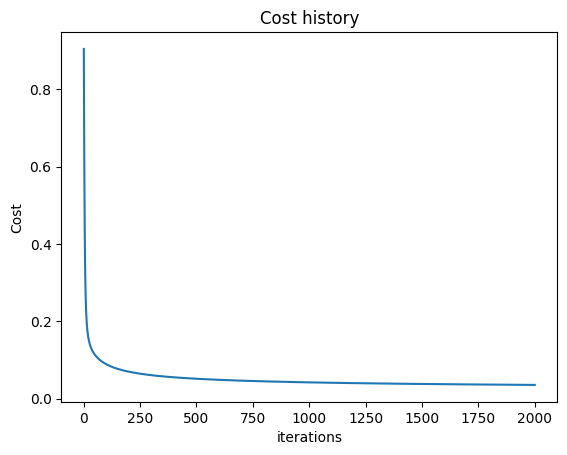

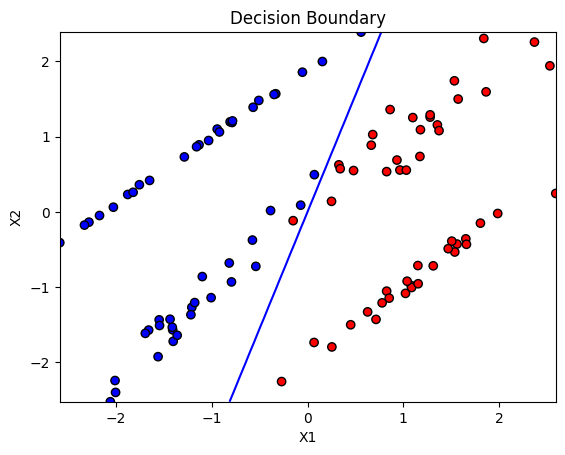

In [81]:



def sigmoid(z):
    # Sigmoid function
    return 1/(1+np.exp(-z))

def logistic_regression(X, y, learning_rate, num_iterations):
    # Initialize parameters: theta
    theta = np.random.randn(2)
    
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted probabilities using the sigmoid function.
        y_pred = sigmoid(np.dot(X,theta))
        
        # Calculate the error: y_pred - y
        error = y_pred - y
       
        # Calculate the gradients:
        gradients = np.array([np.sum(error * X[:,0]),np.sum(error * X[:,1])])
        
        # Update parameters:
        theta -= gradients * learning_rate
        
        # Calculate the cost function: log loss
        cost = -1/m * np.sum((y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred)))
        cost_history.append(cost)

    return theta, cost_history



# Set the learning rate and number of iterations
learning_rate = 0.003
num_iterations = 2000

# Call the logistic_regression function and store the results
theta, cost_history = logistic_regression(X, y, learning_rate, num_iterations)

# Plot the cost function over iterations
iterations = np.arange(1,num_iterations +1 ,1)

plt.plot(iterations , cost_history)
plt.title("Cost history")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()


# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(grid, theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()